In [83]:
import os
import csv
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pyplot import plot, ion, show, savefig, cla, figure

## Helper functions to load and process original csv files

In [84]:
# this function load one .cvs (a sequence)
def load_data(dataset, csv_folder='./NAB-known-anomaly/csv-files/'):
	if dataset == 'wind_power':
		data_file = os.path.join(csv_folder, 'wind_power_mini.csv')
		anomalies = ['2013-12-22 20:00:00', '2014-04-13 09:00:00']
		t_unit = '1s'

	t = []
	readings = [] 
	idx_anomaly = []
	i = 0
	with open(data_file) as csvfile:
		readCSV = csv.reader(csvfile, delimiter=',')
		print("\n--> Anomalies occur at:")
		for row in readCSV:
			if i > 0:
				t.append(i)
				#print(row[1:10])
				readings.append([float(x) if x!="" else 0 for x in row[1:26]])
				if int(row[26]) == 1:
					idx_anomaly.append(i)
					#print("  timestamp #{}: {}".format(j, row[0]))
			i = i + 1
	t = np.asarray(t)
	readings = np.asarray(readings)
	print("\nOriginal csv file contains {} timestamps.".format(t.shape))
	print("Processed time series contain {} readings.".format(readings.shape))
	print("Anomaly indices are {}".format(idx_anomaly))
	
	return t, t_unit, readings, idx_anomaly

In [85]:
# This function plots a dataset with the train/test split and known anomalies
# Relies on helper function load_data()

def process_and_save_specified_dataset(dataset, idx_split, y_scale=5, save_file=False):
	t, t_unit, readings, idx_anomaly = load_data(dataset)
	
	# split into training and test sets
	training = readings[idx_split[0]:idx_split[1]]
	t_train = t[idx_split[0]:idx_split[1]]
	
	# normalise by training mean and std 
	train_m = np.mean(training,axis=0)
	train_std = np.std(training,axis=0)
	print("\nTraining set mean is {}".format(train_m))
	print("Training set std is {}".format(train_std))
	readings_normalised = (readings - train_m) / train_std
	
	
	training = readings_normalised[idx_split[0]:idx_split[1]]
	if idx_split[0] == 0:
		test = readings_normalised[idx_split[1]:]
		t_test = t[idx_split[1]:] - idx_split[1]
		idx_anomaly_test = np.asarray(idx_anomaly) - idx_split[1]
	else:
		test = [readings_normalised[:idx_split[0]], readings_normalised[idx_split[1]:]]
		t_test = [t[:idx_split[0]], t[idx_split[1]:] - idx_split[1]]
		idx_anomaly_split = np.squeeze(np.argwhere(np.asarray(idx_anomaly)>idx_split[0]))
		idx_anomaly_test = [np.asarray(idx_anomaly[:idx_anomaly_split[0]]), 
							np.asarray(idx_anomaly[idx_anomaly_split[0]:]) - idx_split[1]]
	print("Anomaly indices in the test set are {}".format(idx_anomaly_test))
	
	if save_file:
		save_dir = '../datasets/NAB-known-anomaly/'
		np.savez(save_dir+dataset+'.npz', t=t, t_unit=t_unit, readings=readings, idx_anomaly=idx_anomaly,
					idx_split=idx_split, training=training, test=test, train_m=train_m, train_std=train_std,
					t_train=t_train, t_test=t_test, idx_anomaly_test=idx_anomaly_test)
		print("\nProcessed time series are saved at {}".format(save_dir+dataset+'.npz'))
	else:
		print("\nProcessed time series are not saved.")
	
	# plot the whole normalised sequence
	fig, axs = plt.subplots(1, 1, figsize=(18, 4), edgecolor='k')
	fig.subplots_adjust(hspace=.4, wspace=.4)
	# axs = axs.ravel()
	# for i in range(4):
	axs.plot(t, readings_normalised)
	if idx_split[0] == 0:
		axs.plot(idx_split[1]*np.ones(20), np.linspace(-y_scale,y_scale,20), 'b--')
	else:
		for i in range(2):
			axs.plot(idx_split[i]*np.ones(20), np.linspace(-y_scale,y_scale,20), 'b--')
	for j in range(len(idx_anomaly)):
		axs.plot(idx_anomaly[j]*np.ones(20), np.linspace(-y_scale,y_scale,20), 'r--')
	#     axs.plot(data[:,1])
	axs.grid(True)
	axs.set_xlim(0, len(t))
	axs.set_ylim(-y_scale, y_scale)
	axs.set_xlabel("timestamp (every {})".format(t_unit))
	axs.set_ylabel("normalised readings")
	axs.set_title("{} dataset\n(normalised by train mean {} and std {})".format(dataset, train_m, train_std))
	axs.legend(('data', 'train test set split', 'anomalies'))
	
	return t, readings_normalised

## Example on ambient temperature series


--> Anomalies occur at:

Original csv file contains (12664,) timestamps.
Processed time series contain (12664, 25) readings.
Anomaly indices are [5790, 5791, 5792, 8310, 8701, 8702, 8703, 8949, 8950, 8951, 8952, 8953, 8954, 8955, 8956, 8957, 8958, 8959, 8960, 8961, 8962, 8963, 8964, 8965, 8966, 8967, 8968, 8969, 8970, 8971, 8972, 8973, 8974, 8975, 8976, 8977, 8978, 8979, 8980, 8981, 8982, 8983, 8984, 8985, 8986, 8987, 8988, 8989, 8990, 8991, 8992, 8993, 8994, 8995, 8996, 8997, 8998, 8999, 9000, 9001, 9002, 9003, 9004, 9005, 9006, 9007, 9008, 9009, 9010, 9011, 9012, 9013, 9014, 9015, 9016, 9017, 9018, 9019, 9020, 9021, 9022, 9023, 9024, 9025, 9026, 9027, 9028, 9029, 9030, 9031, 9032, 9033, 9034, 9035, 9036, 9037, 9038, 9039, 9040, 9041, 9042, 9043, 9044, 9045, 9046, 9047, 9048, 9049, 9050, 9051, 9052, 9053, 9054, 9055, 9056, 9057, 9058, 9059, 9060, 9061, 9062, 9063, 9064, 9065, 9066, 9067, 9068, 9069, 9070, 9071, 9072, 9073, 9074, 9075, 9076, 9077, 9078, 9079, 9080, 9081, 9082, 9083, 9

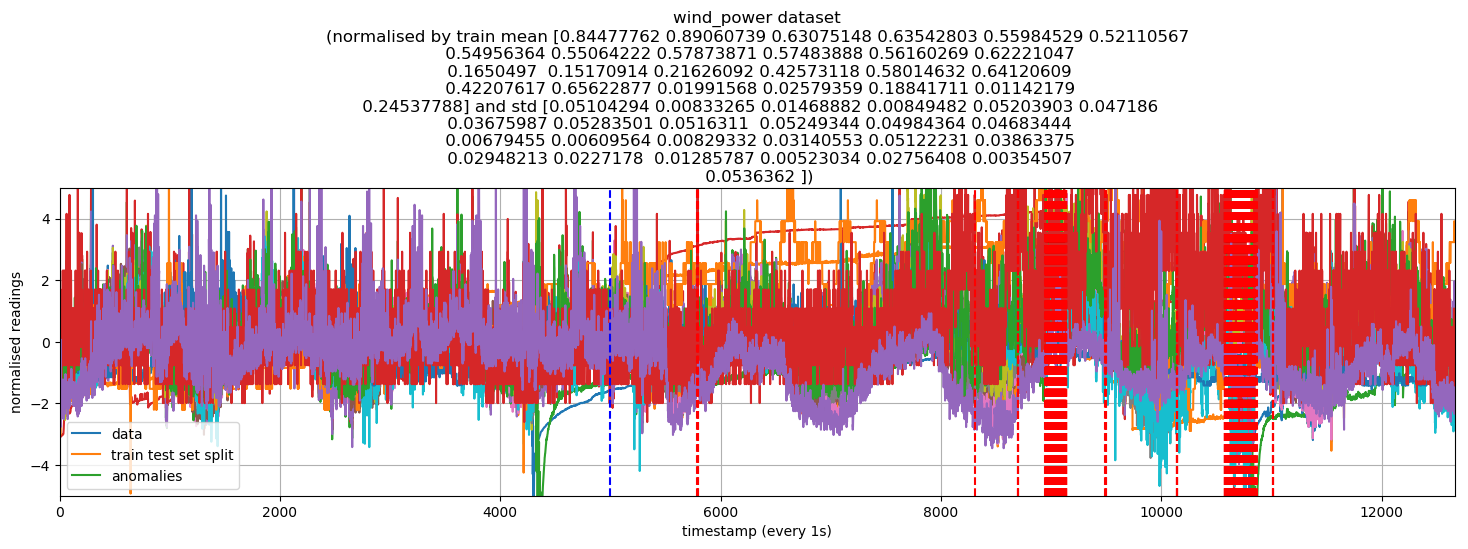

In [86]:
dataset = 'wind_power'
idx_split = [0,5000]

t, readings_normalised = process_and_save_specified_dataset(dataset, idx_split,save_file=True)